In [211]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los dataFrames

# Fase 1: 

### Exploración y Limpieza

______

1. **Exploración Inicial:**

### Customer Flight Activity.csv

Este archivo contiene información sobre la actividad de vuelo de los clientes, incluyendo el número de vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos redimidos

- **Loyalty Number:** Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.

- **Year:** Indica el año en el cual se registraron las actividades de vuelo para el cliente.

- **Month:** Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.

- **Flights Booked:** Número total de vuelos reservados por el cliente en ese mes específico.

- **Flights with Companions:** Número de vuelos reservados en los cuales el cliente viajó con acompañantes.

- **Total Flights:** El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.

- **Distance:** La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.

- **Points Accumulated:** Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.

- **Points Redeemed:** Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.

- **Dollar Cost Points Redeemed:** El valor en dólares de los puntos que el cliente ha redimido durante el mes.

In [212]:
# cargamos el csv específico que muestra la actividad de los clientes: 
df_activity = pd.read_csv('Customer Flight Activity.csv')

df_activity.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [213]:
df_activity.tail(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [214]:
df_activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
248737,743849,2018,3,0,0,0,0,0.0,0,0
338296,114414,2018,9,2,0,2,2100,210.0,0,0
118800,127039,2017,8,6,0,6,2568,256.0,0,0
300146,780389,2018,6,0,0,0,0,0.0,0,0
120940,241967,2017,8,12,0,12,1260,126.0,0,0


In [215]:
df_activity.shape

(405624, 10)

In [216]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [217]:
# Compruebo que la columna 'Points Accumulated' sea de tipo float debido al tipo de dato, y no por la presencia de valores NaN. 

In [218]:
df_activity.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [219]:
# Parece que no se registran valores nulos. 

In [220]:
df_activity.duplicated().sum()

np.int64(1864)

In [221]:
# Sin embargo, hay una cantidad elevada de duplicados

In [222]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [223]:
df_activity.duplicated(subset='Loyalty Number').sum()

np.int64(388887)

In [224]:
df_activity.duplicated(subset='Year').sum()

np.int64(405622)

In [225]:
df_activity.duplicated(subset='Month').sum()

np.int64(405612)

In [226]:
df_activity.duplicated(subset='Flights Booked').sum()

np.int64(405602)

In [227]:
df_activity.duplicated(subset='Flights with Companions').sum()

np.int64(405612)

In [228]:
df_activity.duplicated(subset='Total Flights').sum()

np.int64(405591)

In [229]:
df_activity.duplicated(subset='Distance').sum()

np.int64(400878)

In [230]:
df_activity.duplicated(subset='Points Accumulated').sum()

np.int64(404075)

In [231]:
df_activity.duplicated(subset='Points Redeemed').sum()

np.int64(405037)

In [232]:
df_activity.duplicated(subset='Dollar Cost Points Redeemed').sum()

np.int64(405575)

In [233]:
df_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [234]:
# Después de mirar los datos, que haya tantos duplicados en estas columnas es lo esperado y necesario. Los datos solo confirman que son un registro de la actividad a lo largo del tiempo. 

______

### Exploracion en detalle de los insights obtenidos en table de 'Customer Flight Activity':

In [235]:
df_activity[df_activity.duplicated(subset='Loyalty Number', keep=False)].sort_values('Loyalty Number').head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
101406,100018,2017,7,10,0,10,3870,387.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
169010,100018,2017,11,13,1,14,3374,337.0,0,0
46353,100018,2018,10,6,4,10,3110,311.0,385,31
304218,100018,2018,7,9,7,16,2736,273.0,0,0
16901,100018,2017,2,2,2,4,1320,132.0,0,0
213311,100018,2017,3,14,3,17,2533,253.0,438,36


In [236]:
df_activity['Loyalty Number'].unique()

array([100018, 100102, 100140, ..., 999731, 999788, 999891],
      shape=(16737,))

In [237]:
df_activity['Loyalty Number'].nunique()

16737

In [238]:
# Dado que cada valor único de la columna 'Loyalty Number' corresponde a un solo cliente, esto indica que hay un total de 16.737 clientes registrados.

In [239]:
df_activity['Loyalty Number'].value_counts()

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [240]:
df_activity['Loyalty Number'].describe().reset_index()

,index,Loyalty Number
0,count,405624.000000
1,mean,550037.873084
2,std,258935.286969
3,min,100018.000000
4,25%,326961.000000
5,50%,550834.000000
6,75%,772194.000000
7,max,999986.000000


<Axes: xlabel='Loyalty Number', ylabel='Count'>

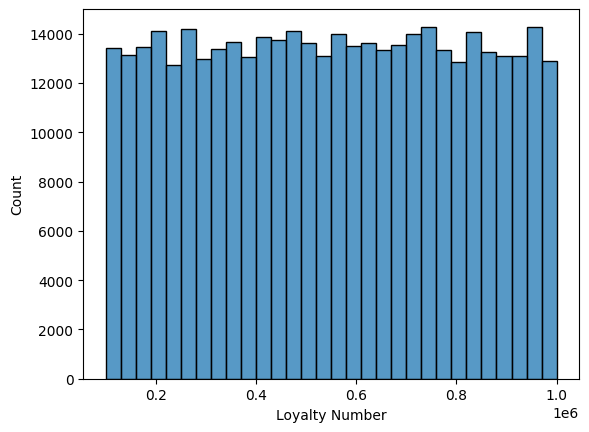

In [241]:
sns.histplot(data=df_activity, x='Loyalty Number', bins=30)

In [242]:
# La distribucion de los Loyalty Number parece ser uniforme

In [243]:
# función para analizar las métricas generales de cada tabla: 

def exploracion_num(dataframe, col):
    print(f'El mínimo de {col} es {dataframe[col].min()}')
    print(f'El máximo de {col} es {dataframe[col].max()}')
    print(f'La media de {col} es {dataframe[col].mean()}')
    print(f'La mediana de {col} es {dataframe[col].median()}')

    sns.histplot(data=dataframe, x=col)
    plt.show();
    sns.boxplot(data=dataframe, x=col)
    plt.show();

In [244]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

El mínimo de Year es 2017
El máximo de Year es 2018
La media de Year es 2017.5
La mediana de Year es 2017.5


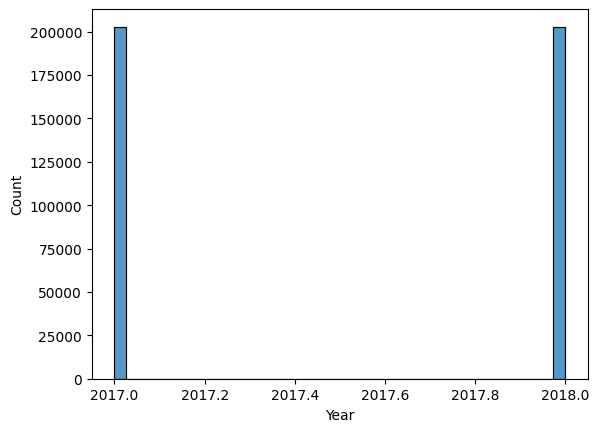

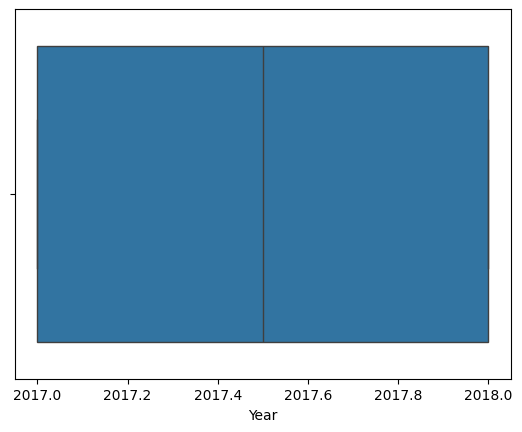

In [245]:
exploracion_num(df_activity, 'Year')

In [246]:
# Los datos registrados comprenden los años entre 2017 y 2018. 

El mínimo de Month es 1
El máximo de Month es 12
La media de Month es 6.5
La mediana de Month es 6.5


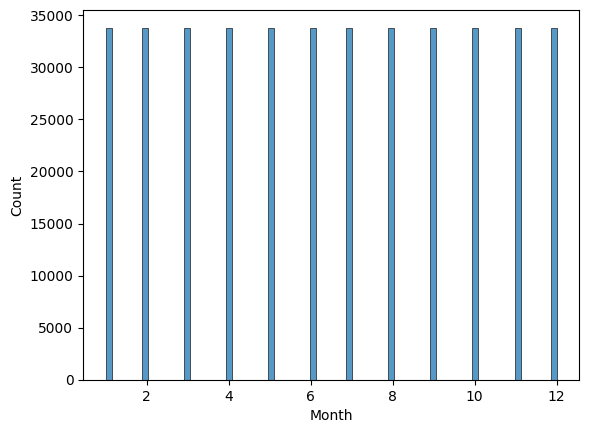

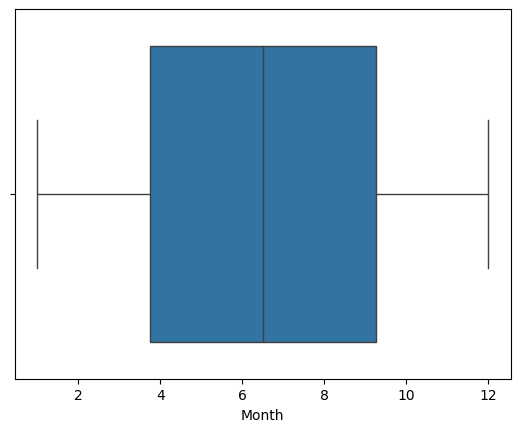

In [247]:
exploracion_num(df_activity, 'Month')

In [248]:
# Y han viajado durante todos los meses del año de forma homogénea

El mínimo de Flights Booked es 0
El máximo de Flights Booked es 21
La media de Flights Booked es 4.115052363765457
La mediana de Flights Booked es 1.0


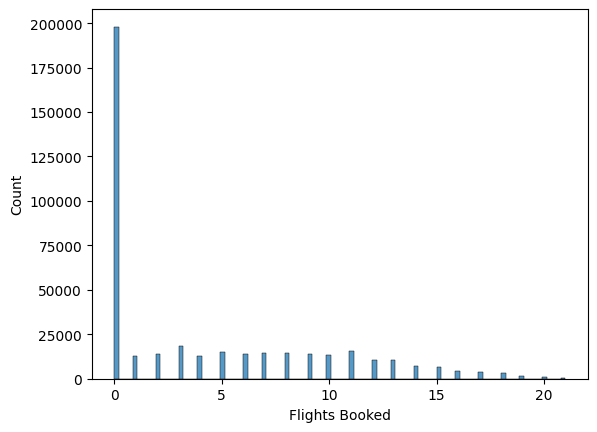

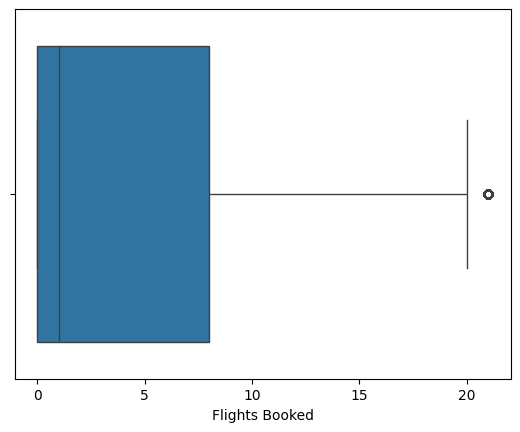

In [249]:
exploracion_num(df_activity, 'Flights Booked')

Este histograma muestra la distribución del número total de vuelos reservados por cliente en un mes específico. La interpretación muestra una fuerte asimetría, ya que está sesgada a la derecha (asimetría positiva). 

La característica más importante es el pico masivo en 0 vuelos reservados. Esto indica que la gran mayoría de los registros de actividad corresponden a meses donde el cliente **no realizó ninguna reserva**.

Hay un grupo pequeño pero significativo de clientes que reservan un número bajo de vuelos. Mientras que los clientes que reservan 5 o más vuelos son mucho menos comunes. 

<Axes: xlabel='Month', ylabel='Flights Booked'>

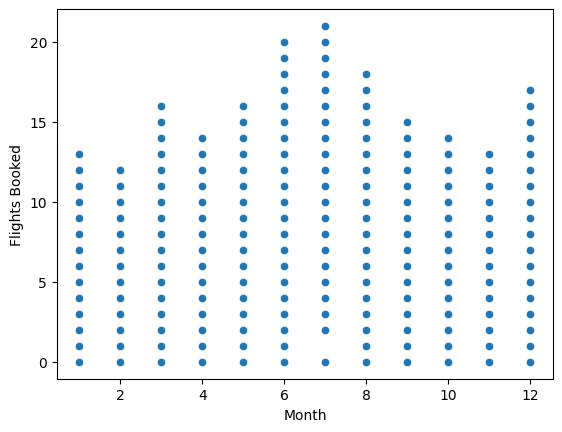

In [250]:
sns.scatterplot(data=df_activity, x='Month', y='Flights Booked')

In [251]:
# Relación entre el mes del año y el numero de vuelos reservados por los clientes. 


El mínimo de Flights with Companions es 0
El máximo de Flights with Companions es 11
La media de Flights with Companions es 1.031805317239611
La mediana de Flights with Companions es 0.0


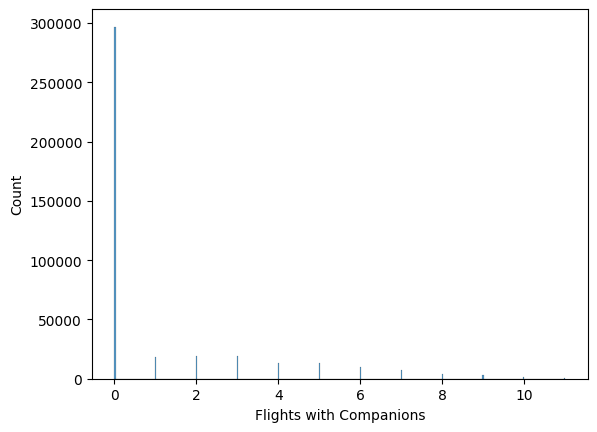

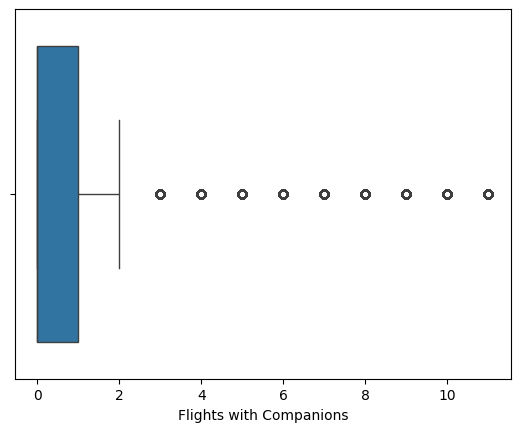

In [252]:
exploracion_num(df_activity, 'Flights with Companions')

<Axes: xlabel='Month', ylabel='Flights with Companions'>

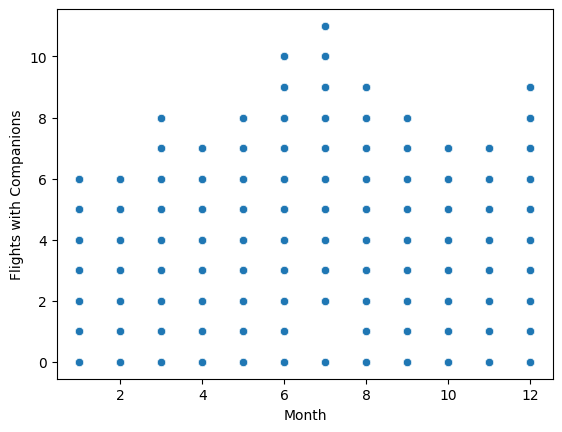

In [253]:
sns.scatterplot(data=df_activity, x='Month', y='Flights with Companions')

Las gráficas y los datos muestran que la gran mayoría de clientes viajan solos. Siendo de nuevo en los meses de verano y Diciembre, cuando además de mas viajes reservados, se viaja acompañado. 

__________

### Customer Loyalty History.csv

Este archivo proporciona un perfil detallado de los clientes, incluyendo su ubicación, nivel educativo, ingresos, estado civil, y detalles sobre su membresía en el programa de lealtad (como el tipo de tarjeta, valor de vida del cliente, y fechas de inscripción y cancelación).

- **Loyalty Number:** Identificador único del cliente dentro del programa de lealtad. Este número permite correlacionar la información de este archivo con el archivo de actividad de vuelos.

- **Country:** País de residencia del cliente.

- **Province:** Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).

- **City:** Ciudad de residencia del cliente.

- **Postal Code:** Código postal del cliente.

- **Gender:** Género del cliente (ej. Male para masculino y Female para femenino).

- **Education:** Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).

- **Salary:** Ingreso anual estimado del cliente.

- **Marital Status:** Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).

- **Loyalty Card:** Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.

- **CLV (Customer Lifetime Value):** Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.

- **Enrollment Type:** Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).

- **Enrollment Year:** Año en que el cliente se inscribió en el programa de lealtad.

- **Enrollment Month:** Mes en que el cliente se inscribió en el programa de lealtad.

- **Cancellation Year:** Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.

- **Cancellation Month:** Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.


In [254]:
df_history = pd.read_csv('Customer Loyalty History.csv')

df_history.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [255]:
# Valores nulos detectados en las columnas de 'Salary', 'Cancellation Year' y 'Cancellation Month'. 

In [256]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [257]:
df_history.shape

(16737, 16)

In [258]:
df_history.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [259]:
round(df_history.isna().sum()/df_history.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [260]:
# Son valores nulos con porcentajes muy elevados. 

In [261]:
df_history.duplicated().sum()

np.int64(0)

In [262]:
df_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [263]:
df_history.duplicated(subset='Loyalty Number').sum()

np.int64(0)

In [264]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [265]:
# Llama la atencion que el valor mínimo de salario está en negativo...

In [266]:
df_history.describe(include='O').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [267]:
df_history.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [268]:
df_history['Country'].unique()

array(['Canada'], dtype=object)

In [269]:
df_history['Province'].unique()

array(['Ontario', 'Alberta', 'British Columbia', 'Quebec', 'Yukon',
       'New Brunswick', 'Manitoba', 'Nova Scotia', 'Saskatchewan',
       'Newfoundland', 'Prince Edward Island'], dtype=object)

In [270]:
df_history['City'].unique()

array(['Toronto', 'Edmonton', 'Vancouver', 'Hull', 'Whitehorse',
       'Trenton', 'Montreal', 'Dawson Creek', 'Quebec City',
       'Fredericton', 'Ottawa', 'Tremblant', 'Calgary', 'Thunder Bay',
       'Whistler', 'Peace River', 'Winnipeg', 'Sudbury', 'West Vancouver',
       'Halifax', 'London', 'Regina', 'Kelowna', "St. John's", 'Victoria',
       'Kingston', 'Banff', 'Moncton', 'Charlottetown'], dtype=object)

In [271]:
df_history['Postal Code'].unique()

array(['M2Z 4K1', 'T3G 6Y6', 'V6E 3D9', 'P1W 1K4', 'J8Y 3Z5', 'Y2K 6R0',
       'P5S 6R4', 'K8V 4B2', 'H2Y 2W2', 'M8Y 4K8', 'U5I 4F1', 'G1B 3L5',
       'H4G 3T4', 'M2M 7K8', 'M2M 6J7', 'E3B 2H2', 'M1R 4K3', 'T9G 1W3',
       'H2Y 4R4', 'V5R 1W3', 'P1L 8X8', 'K1F 2R2', 'H5Y 2S9', 'V1E 4R6',
       'H2T 2J6', 'T3E 2V9', 'H2T 9K8', 'K8T 5M5', 'V6T 1Y8', 'P2T 6G3',
       'T9O 2W2', 'V6E 3Z3', 'R6Y 4T5', 'M5V 1G5', 'V6V 8Z3', 'B3J 9S2',
       'M5B 3E4', 'R2C 0M5', 'S6J 3G0', 'M2P 4F6', 'P1J 8T7', 'V09 2E9',
       'A1C 6H9', 'V10 6T5', 'B3C 2M8', 'M9K 2P4', 'T4V 1D4', 'R3R 3T4',
       'S1J 3C5', 'E1A 2A7', 'K1G 4Z0', 'H3T 8L4', 'C1A 6E8', 'H3J 5I6',
       'M3R 4K8'], dtype=object)

In [272]:
df_history['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [273]:
df_history['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [274]:
df_history['Marital Status'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [275]:
df_history['Loyalty Card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [276]:
df_history['CLV'].unique()

array([ 3839.14,  3839.61,  3839.75, ..., 44771.3 , 50568.26, 61134.68],
      shape=(7984,))

In [277]:
df_history['Enrollment Type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [278]:
# No parece haber ninguna otra anomalía en la tabla

**Conclusiones finales del Exploratory Data Analysis (EDA):** 

Tabla 'Customer Flight Activity': 

- No parece que haya valores nulos registrados 
- Hay una cantidad muy elevada de duplicados, pero solo confirman que son un registro de la actividad a lo largo del tiempo
- Los datos indican que hay un total de 16.737 clientes registrados
- La distribución de los 'Loyalty Number' parece ser uniforme
- La tabla contiene los viajes reservados entre los años 2017-2018 
- Los clientes han reservado viajes todos los meses del año de forma homogénea
- Hay una relación considerable entre el mes del año y el número de vuelos reservados
- La mayoría de los clientes viajan solo, exceptuando los meses de alta temporada de vacaciones


Tabla 'Customer Loyalty History': 

- Valores nulos detectados en las columnas de 'Salary', 'Cancellation Year' y 'Cancellation Month'. 
- Valores en negativo introducidos en la columna de 'Salary'
- Valores nulos de 'Salary' 
- Parece que los datos registrados se basan solo en el país de Canadá 


____

2. **Limpieza de Datos:**

##### - Transformaciones en la columna de 'Salary': 

In [279]:
df_history['Salary'].isna().sum()

np.int64(4238)

In [280]:
df_history['Salary'].value_counts(dropna=False)

Salary
 NaN         4238
 101933.0      23
 62283.0       14
 51573.0       14
 61809.0       14
             ... 
 70732.0        1
 99706.0        1
 99204.0        1
 47702.0        1
-57297.0        1
Name: count, Length: 5891, dtype: int64

In [281]:
df_history['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.],
      shape=(5891,))

In [282]:
df_history['Salary'].nunique()

5890

In [283]:
df_history['Salary'].value_counts(dropna=False, normalize=True)*100

Salary
 NaN         25.321145
 101933.0     0.137420
 62283.0      0.083647
 51573.0      0.083647
 61809.0      0.083647
               ...    
 70732.0      0.005975
 99706.0      0.005975
 99204.0      0.005975
 47702.0      0.005975
-57297.0      0.005975
Name: proportion, Length: 5891, dtype: float64

In [284]:
# Antes de tratar los valores nulos, convierto los datos negativos a valor absoluto para evitar que afecte a las métricas generales, ya que se interpreta como un error al haber insertado los datos. 

In [285]:
df_history['Salary'] = df_history['Salary'].abs()

In [286]:
df_history['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.],
      shape=(5891,))

In [287]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79359.340907,34749.691464,9081.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [288]:
round(df_history['Salary'].value_counts(dropna=False, normalize=True)*100, 2)

Salary
NaN         25.32
101933.0     0.14
62283.0      0.08
51573.0      0.08
61809.0      0.08
            ...  
70732.0      0.01
99706.0      0.01
99204.0      0.01
47702.0      0.01
57297.0      0.01
Name: proportion, Length: 5891, dtype: float64

In [289]:
# Las métricas generales se han actualizado, pero todavía existen un 25% de valores nulos. 

El mínimo de Salary es 9081.0
El máximo de Salary es 407228.0
La media de Salary es 79359.34090727258
La mediana de Salary es 73455.0


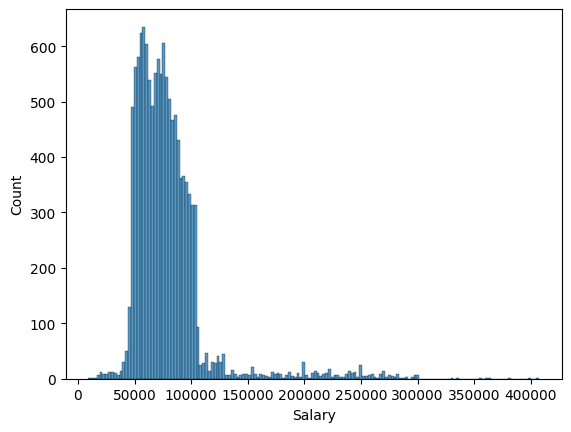

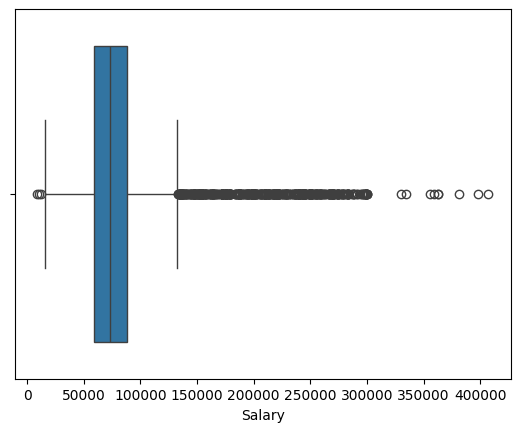

In [290]:
exploracion_num(df_history, 'Salary')

El análisis de la columna de 'Salary' revela una fuerte asimetría positiva, con la mayoría de los clientes concentrados en el rango de 50,000 a 100,000 dólares. Dado que el 25% de los datos de salario son nulos, y la distribución es sesgada, la estrategia de imputación más robusta y recomendable es utilizar la mediana (73,455) en lugar de la media, para evitar sesgar el conjunto de datos con los valores extremos altos. 

In [291]:
df_history['Salary'].median()

np.float64(73455.0)

In [292]:
# Valores nulos actualizados con la mediana: 

In [293]:
df_history['Salary'].fillna(df_history['Salary'].median(), inplace=True)

In [294]:
round(df_history['Salary'].value_counts(dropna=False, normalize=True)*100, 2)

Salary
73455.0     25.33
101933.0     0.14
62283.0      0.08
51573.0      0.08
61809.0      0.08
            ...  
70732.0      0.01
99706.0      0.01
99204.0      0.01
47702.0      0.01
57297.0      0.01
Name: proportion, Length: 5890, dtype: float64

In [295]:
df_history['Salary'].unique()

array([ 83236.,  73455., 103495., ...,  76178.,  91970.,  57297.],
      shape=(5890,))

_____

##### Transformaciones en las columnas de 'Cancellation Year', 'Cancellation Month' y 'Enrollment Month': 

In [296]:
round(df_history.isna().sum()/df_history.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                 0.00
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [297]:
df_history['Cancellation Year'].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [298]:
df_history['Cancellation Month'].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [299]:
df_history['Cancellation Year'].isna().sum()

np.int64(14670)

In [300]:
df_history.shape

(16737, 16)

In [301]:
df_history['Cancellation Month'].isna().sum()

np.int64(14670)

In [302]:
df_history['Cancellation Year'].value_counts(dropna=False)


Cancellation Year
NaN       14670
2018.0      645
2017.0      506
2016.0      427
2015.0      265
2014.0      181
2013.0       43
Name: count, dtype: int64

In [303]:
df_history['Cancellation Month'].value_counts(dropna=False)

Cancellation Month
NaN     14670
12.0      213
11.0      212
8.0       208
7.0       186
10.0      180
9.0       176
6.0       165
1.0       155
3.0       149
5.0       148
2.0       139
4.0       136
Name: count, dtype: int64

In [304]:
df_history.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [305]:
# Decido reemplazar los NaN tanto en 'Cancellation Year' como en 'Cancellation Month' por 'Active', ya que, según la documentación, estos campos solo se completan cuando la cancelación se ha realizado y por lo tanto, dichos clientes sigue activos. 

In [306]:
df_history['Cancellation Year'] = df_history['Cancellation Year'].fillna('Active')

In [307]:
df_history['Cancellation Year'].head(5)

0    Active
1    Active
2    2018.0
3    Active
4    Active
Name: Cancellation Year, dtype: object

In [308]:
df_history['Cancellation Month'] = df_history['Cancellation Month'].fillna('Active')

In [309]:
df_history['Cancellation Month'].head(5)

0    Active
1    Active
2       1.0
3    Active
4    Active
Name: Cancellation Month, dtype: object

In [310]:
meses = {
    1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'
}

In [311]:
df_history['Cancellation Month'] = df_history['Cancellation Month'].map(lambda x: meses.get(x, x))

In [312]:
df_history['Cancellation Month'].head(5)

0     Active
1     Active
2    January
3     Active
4     Active
Name: Cancellation Month, dtype: object

In [313]:
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,Active,Active
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,Active,Active
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,2018.0,January
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,Active,Active
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,Active,Active


In [314]:
# Como los valores de 'Cancellation Month' fueron convertidos a tipo string, procederé a realizar la misma conversión en la columna de 'Enrollment Month', para unificar datos. 

In [315]:
df_history.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,Active,Active
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,Active,Active


In [316]:
df_history['Enrollment Month'].unique()

array([ 2,  3,  7, 10,  5,  6, 12,  1, 11,  8,  4,  9])

In [317]:
meses_enrollment = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [318]:
df_history['Enrollment Month'] = df_history['Enrollment Month'].map(lambda x: meses_enrollment.get(x, x))

In [319]:
df_history.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,February,Active,Active
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,March,Active,Active
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,July,2018.0,January
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,February,Active,Active
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,October,Active,Active


_____

In [320]:
# Procedemos a la unificación de las dos tablas por la columna que tienen en común 'Loyalty Number'

In [321]:
df_unido = pd.merge(df_history, df_activity, on='Loyalty Number')

In [322]:
df_unido.to_csv("Customer_Activity_History.csv", index=False)

Modificaciones ejecutadas: 

- 'Salary': Valores a absolutos y nulos reemplazados por la mediana. 
- 'Cancellation Year': Nulos reemplazados por 'Active'. 
- 'Cancellation Month': Nulos reemplazados por 'Active', meses reemplazados por objetos (nombre de cada mes) 
- 'Enrollment Month': Meses reemplazados por objetos (nombre de cada mes)


____

### Fase 2: Visualización 

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [323]:
df_unido.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

<Axes: xlabel='Month', ylabel='Flights Booked'>

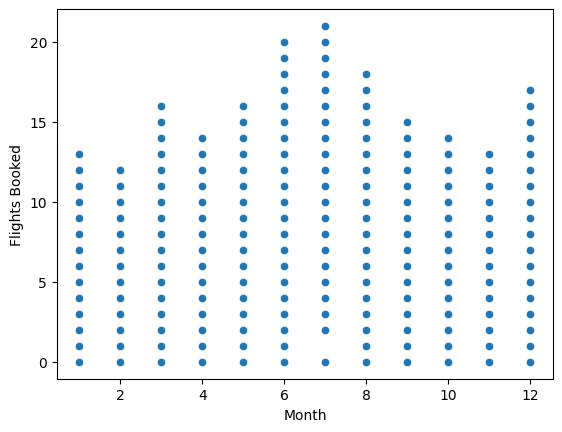

In [324]:
sns.scatterplot(data=df_unido, x='Month', y='Flights Booked')

Es interesante ver como este scatterplot muestra la relación entre el mes del año y el numero de vuelos reservados por los clientes. 

Al observar los valores máximos de vuelos reservados por mes, se identifica un patrón estacional claro: 

- El número máximo de vuelos reservados por un solo cliente tiende a ser significativamente mayor durante los meses de verano (junio, julio y agosto). 

- Junio (6) y Julio (7) muestran los puntos más altos, superando las 20 reservas. 

- Los meses de baja actividad máxima ocurren a principios y a finales de año, aunque el mes de Diciembre (12) experimenta un repunte notable, siendo consistente con la temporada de viajes de fin de año y días festivos. 

___

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [325]:
df_unido.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

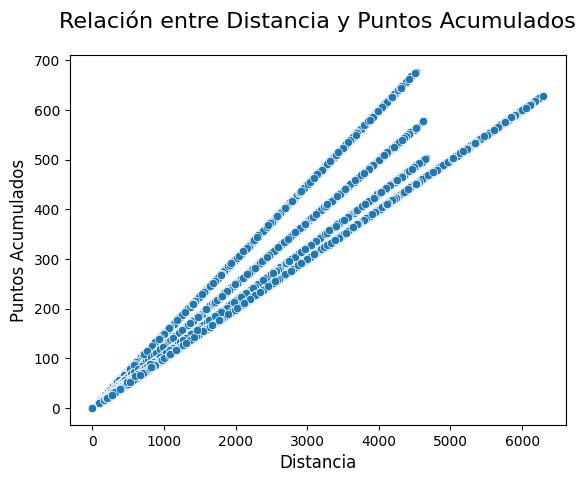

In [336]:
sns.scatterplot(data=df_unido, x='Distance', y='Points Accumulated')

plt.title('Relación entre Distancia y Puntos Acumulados', fontsize=16, pad=20)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12);

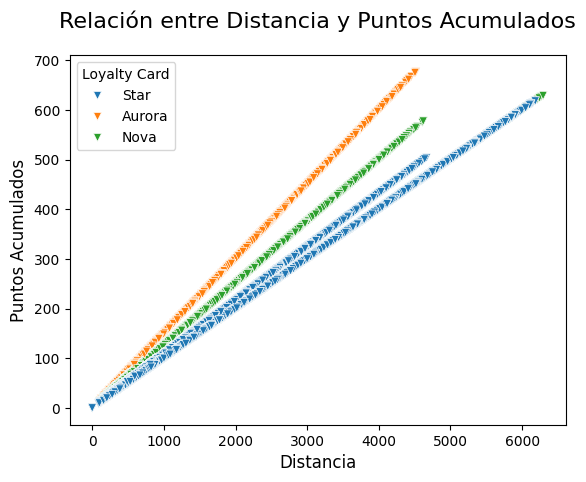

In [327]:
sns.scatterplot(data=df_unido, x='Distance', y='Points Accumulated', hue='Loyalty Card', marker= "v")

plt.title('Relación entre Distancia y Puntos Acumulados', fontsize=16, pad=20)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12);

In [328]:
df_unido['Loyalty Card'].value_counts()

Loyalty Card
Star      184224
Nova      137568
Aurora     83832
Name: count, dtype: int64

Teniendo en cuentas las dos gráficas, existe una relación lineal y positiva entre la distancia volada y los puntos acumulados, lo que demuestra que la acumulación de puntos se basa en una fórmula constante y predecible que utiliza la distancia como insumo principal. 

____

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [329]:
df_unido.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

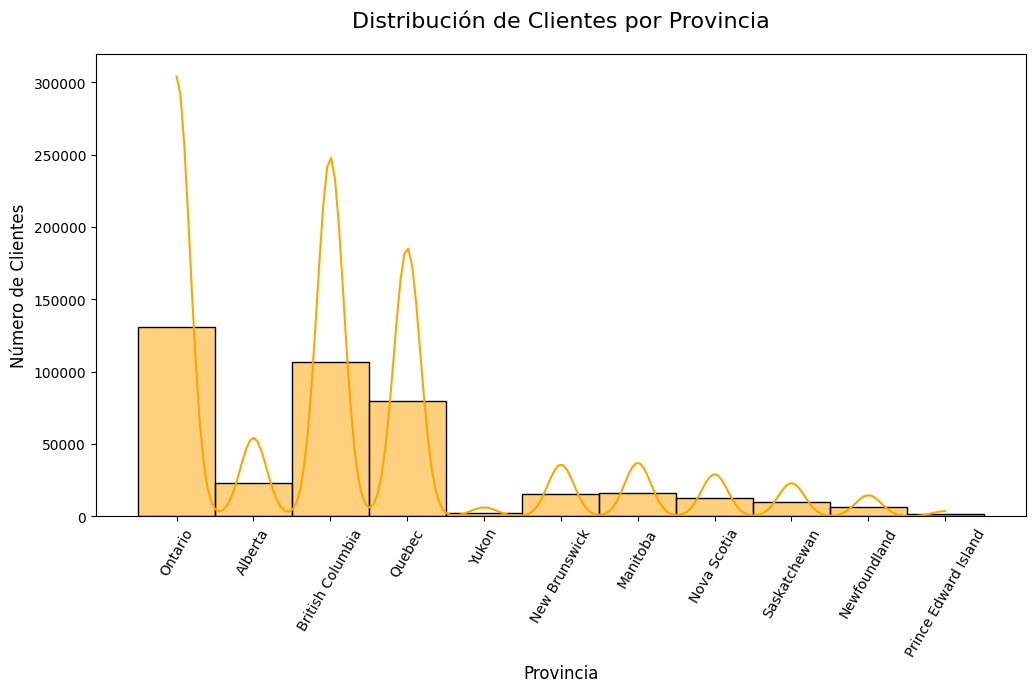

In [330]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df_unido, x='Province', color='orange', kde=True)

plt.xticks(rotation=60)
plt.title('Distribución de Clientes por Provincia', fontsize=16, pad=20)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12);

La distribución geográfica de los clientes de la aerolínea en las provincias o estados es altamente desigual y sesgada, con una fuerte concentracion de la base de clientes en unas pocas jurisdicciones. 

Las provincias de Ontario, British Columbia y Quebec son el centro de la base de clientes con un número que supera significativamente a cualquier otra provincia. 

____

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Text(0, 0.5, 'Nivel Educativo')

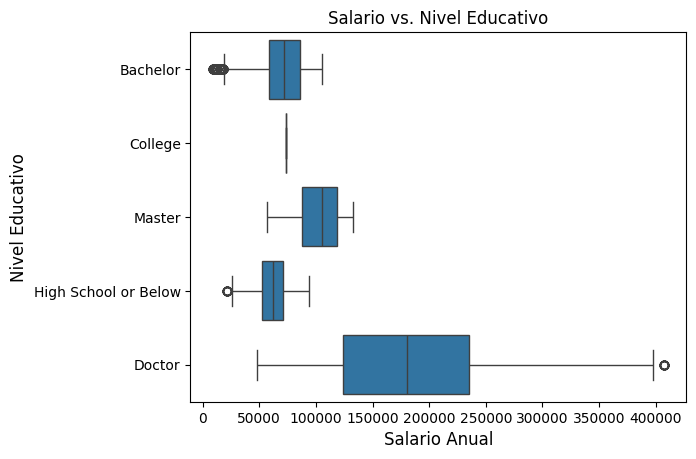

In [331]:
sns.boxplot(data=df_unido, x='Salary', y='Education')

plt.title('Salario vs. Nivel Educativo')
plt.xlabel('Salario Anual', fontsize=12)
plt.ylabel('Nivel Educativo', fontsize=12)

Text(0, 0.5, 'Salario Anual')

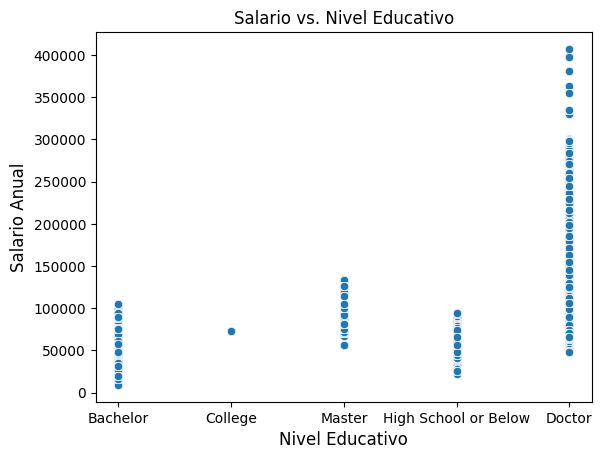

In [332]:
sns.scatterplot(data=df_unido, x='Education', y='Salary')

plt.title('Salario vs. Nivel Educativo')
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario Anual', fontsize=12)

Existe una relación positiva y clara entre el nivel educativo y el salario promedio, aunque la variabilidad es miy alta en los niveles superiores. 

La categoría de Doctor no solo tiene el salario más alto, también la mayor cantidad de valores atípicos (outliers) y la mayor dispersión, lo que significa que en este nivel educativo la diferencia entre el salario más bajo y el más alto es enorme. 

___

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

Text(0, 0.5, 'Número de Registros')

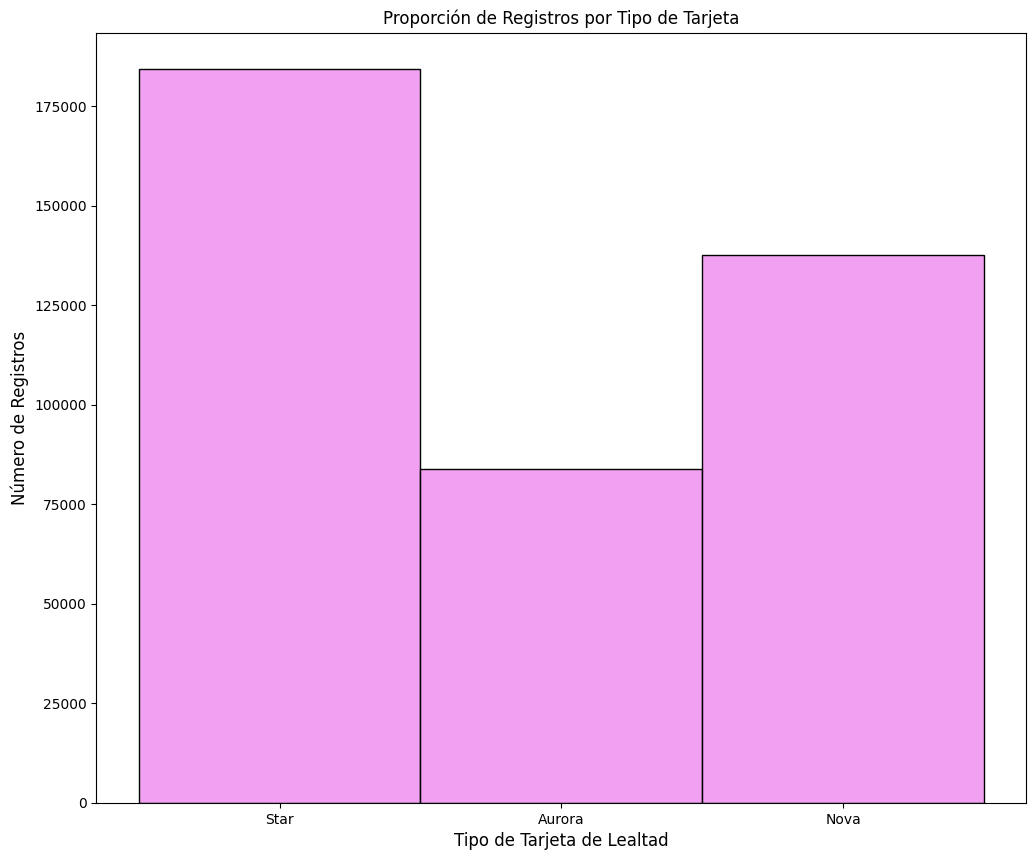

In [342]:
plt.figure(figsize=(12, 10))

sns.histplot(data=df_unido, x='Loyalty Card', color='Violet')

plt.title('Proporción de Registros por Tipo de Tarjeta')
plt.xlabel('Tipo de Tarjeta de Lealtad', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)


Text(0, 0.5, 'Número de Registros')

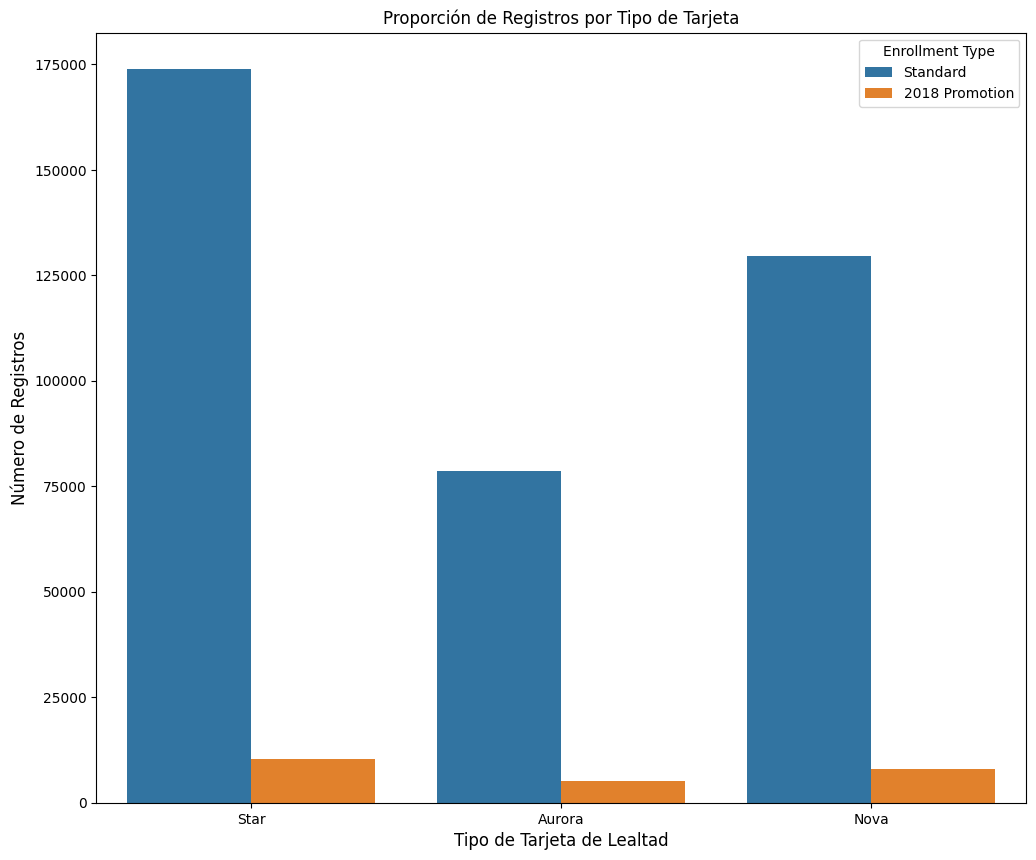

In [340]:
plt.figure(figsize=(12, 10))

sns.countplot(data=df_unido, x='Loyalty Card', hue='Enrollment Type')

plt.title('Proporción de Registros por Tipo de Tarjeta')
plt.xlabel('Tipo de Tarjeta de Lealtad', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)

Las gráficas muestran el conteo total de registros para cada tipo de tarjeta de lealtad: Star, Aurora y Nova. 

La base de clientes está segmentada de manera desigual, con la mayoría de los registros concetrados en los niveles intermedio e inicial, lo cual es típico de un programa de lealtad.

___

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Text(0, 0.5, 'Número de Registros')

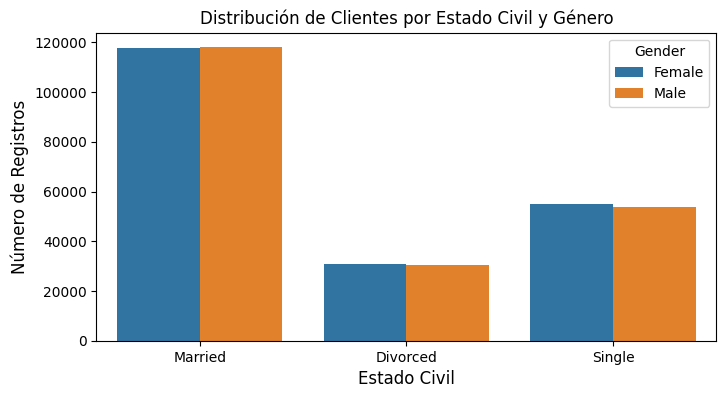

In [334]:
plt.figure(figsize=(8, 4))

sns.countplot(data=df_unido, x='Marital Status', hue='Gender')

plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)

Se puede comprobar que los clientes casados ('Married') constituyen el grupo más grande en el programa de lealtad. 

En los tres estados civiles, la proporción entre hombre y mujer parece estar equilibrada. 

___

Next steps: 

- Que ambas tablas contengan los mismos años de registros. Mientras que 'Customer Loyalty History' comprende datos entre 2013 y 2018, 'Customer Flight Activity' solo comprende los años 2017 y 2018. Esto ayudaría a obtener respuestas más detalladas y acertadas. 

- Añadir campos de educación más allá de 'Doctor' para poder representar a esos 'outliers'.

- Ampliar insights y visualizaciones para un análisis más profundo de la base de datos. 

- Creación de una memoria exhaustiva, con las explicaciones de cada paso, apunte, conclusiones y visualizaciones comentadas para una buena práctica. 
